In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.under_sampling import RandomUnderSampler

In [3]:
# Load dataset
df = pd.read_csv("/content/sample_data/creditcard.csv")

In [15]:
# Data Exploration
print("Dataset Shape:", df.shape)
print("Class Distribution:")
print(df['Class'].value_counts())

Dataset Shape: (284807, 31)
Class Distribution:
Class
0    284315
1       492
Name: count, dtype: int64


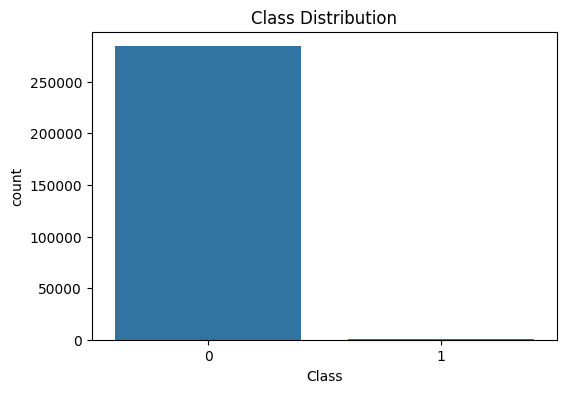

In [16]:
# Visualizing Class Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df)
plt.title("Class Distribution")
plt.show()

In [17]:
# Checking for missing values
print("Missing Values in Dataset:")
print(df.isnull().sum())

Missing Values in Dataset:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [18]:
# Feature Selection and Preprocessing
X = df.drop(columns=['Class'])
y = df['Class']

In [20]:
# Standardize 'Amount' and drop 'Time'
scaler = StandardScaler()
X['Amount'] = scaler.fit_transform(X[['Amount']])
X = X.drop(columns=['Time'])

In [21]:
# Splitting Data before Sampling to compare performance
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Train model without under-sampling
model_orig = LogisticRegression(max_iter=500, solver='lbfgs')
model_orig.fit(X_train_orig, y_train_orig)
y_pred_orig = model_orig.predict(X_test_orig)

In [23]:
print("Performance Without Under-Sampling:")
print("Accuracy:", accuracy_score(y_test_orig, y_pred_orig))
print(classification_report(y_test_orig, y_pred_orig))

Performance Without Under-Sampling:
Accuracy: 0.9990871107053826
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.57      0.68        98

    accuracy                           1.00     56962
   macro avg       0.92      0.79      0.84     56962
weighted avg       1.00      1.00      1.00     56962



In [24]:
# Handling Class Imbalance using Under-Sampling
undersampler = RandomUnderSampler(sampling_strategy=1)
X_resampled, y_resampled = undersampler.fit_resample(X, y)

In [25]:
# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [26]:
# Model Training and Evaluation
model = LogisticRegression(max_iter=500, solver='lbfgs')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [27]:
print("Performance With Under-Sampling:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Performance With Under-Sampling:
Accuracy: 0.934010152284264
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        99
           1       0.97      0.90      0.93        98

    accuracy                           0.93       197
   macro avg       0.94      0.93      0.93       197
weighted avg       0.94      0.93      0.93       197



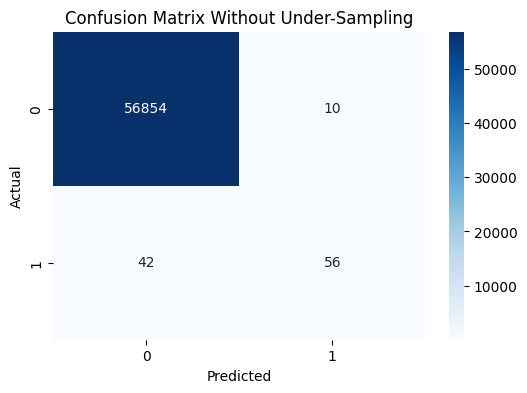

In [28]:
# Visualizing the impact of under-sampling
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test_orig, y_pred_orig), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Without Under-Sampling")
plt.show()

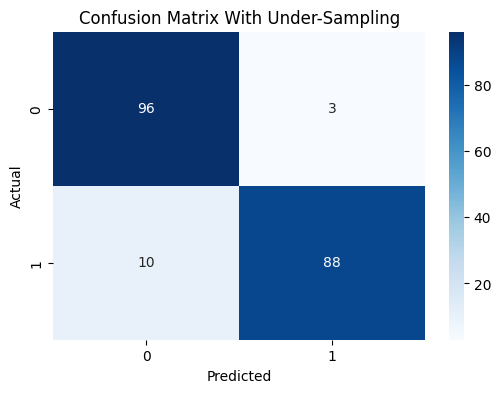

In [29]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix With Under-Sampling")
plt.show()

In [30]:
# Explanation of Improvement
print("\nExplanation:")
print("- Without under-sampling, the model is highly biased towards the majority class (non-fraud), leading to high accuracy but poor fraud detection.")
print("- After applying under-sampling, the model detects fraudulent cases more effectively, improving recall for fraud cases.")


Explanation:
- Without under-sampling, the model is highly biased towards the majority class (non-fraud), leading to high accuracy but poor fraud detection.
- After applying under-sampling, the model detects fraudulent cases more effectively, improving recall for fraud cases.
